In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("../data/raw/laptop_price.csv", encoding="latin1")
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [8]:
df.shape

(1303, 12)

In [9]:
df.isnull().sum()

laptop_ID           0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_ID         1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


### Exploratory Data Analysis(EDA)

#### Visualizing Categorical Features

In [11]:
categorical_features = [x for x in df.columns if df[x].dtype =='object']
categorical_features

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Gpu',
 'OpSys',
 'Weight']

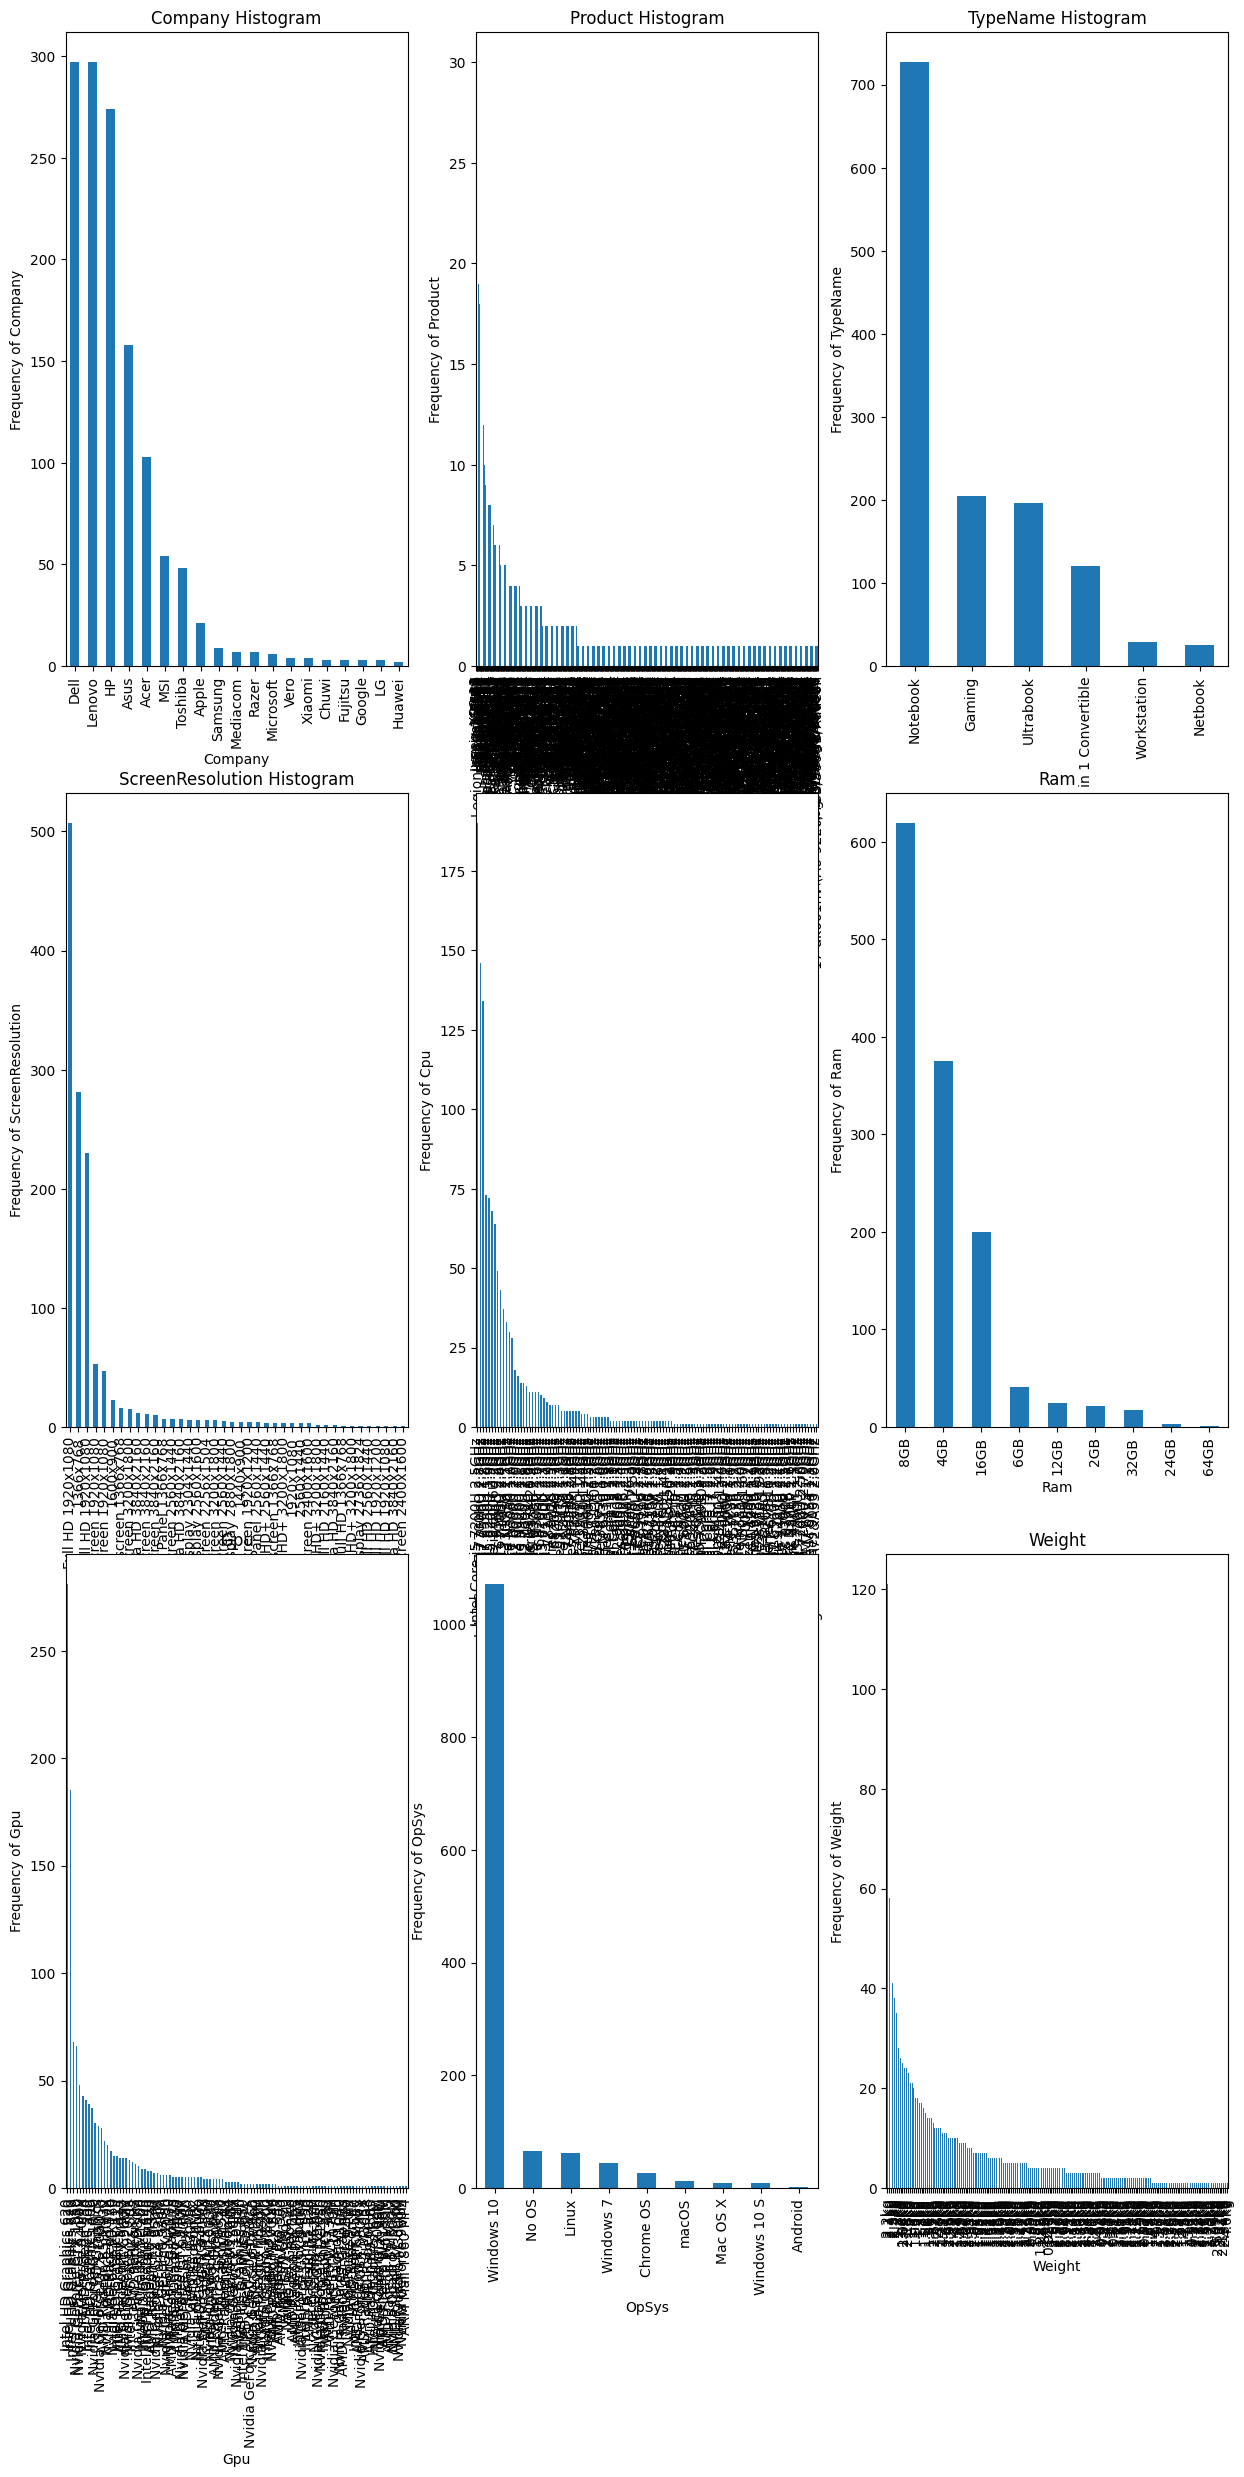

In [12]:
plt.figure(figsize=(15, 28))

plt.subplot(3, 3, 1)
plt1 = df['Company'].value_counts().plot(kind='bar')
plt.title('Company Histogram')
plt1.set(xlabel = 'Company', ylabel='Frequency of Company')

plt.subplot(3, 3, 2)
plt1 = df['Product'].value_counts().plot(kind='bar')
plt.title('Product Histogram')
plt1.set(xlabel = 'Product', ylabel='Frequency of Product')

plt.subplot(3, 3, 3)
plt1 = df['TypeName'].value_counts().plot(kind='bar')
plt.title('TypeName Histogram')
plt1.set(xlabel = 'TypeName', ylabel='Frequency of TypeName')

plt.subplot(3, 3, 4)
plt1 = df['ScreenResolution'].value_counts().plot(kind='bar')
plt.title('ScreenResolution Histogram')
plt1.set(xlabel = 'ScreenResolution', ylabel='Frequency of ScreenResolution')

plt.subplot(3, 3, 5)
plt1 = df['Cpu'].value_counts().plot(kind='bar')
plt.title('Cpu')
plt1.set(xlabel = 'Cpu', ylabel='Frequency of Cpu')

plt.subplot(3, 3, 6)
plt1 = df['Ram'].value_counts().plot(kind='bar')
plt.title('Ram')
plt1.set(xlabel = 'Ram', ylabel='Frequency of Ram')

plt.subplot(3, 3, 7)
plt1 = df['Gpu'].value_counts().plot(kind='bar')
plt.title('Gpu')
plt1.set(xlabel = 'Gpu', ylabel='Frequency of Gpu')

plt.subplot(3, 3, 8)
plt1 = df['OpSys'].value_counts().plot(kind='bar')
plt.title('OpSys')
plt1.set(xlabel = 'OpSys', ylabel='Frequency of OpSys')

plt.subplot(3, 3, 9)
plt1 = df['Weight'].value_counts().plot(kind='bar')
plt.title('Weight')
plt1.set(xlabel = 'Weight', ylabel='Frequency of Weight')

plt.show()

#### Visualizing Numerical Features

In [13]:
numerical_features = [x for x in df.columns if df[x].dtype in ('int64','float64')]
print(numerical_features)

['laptop_ID', 'Inches', 'Price_euros']


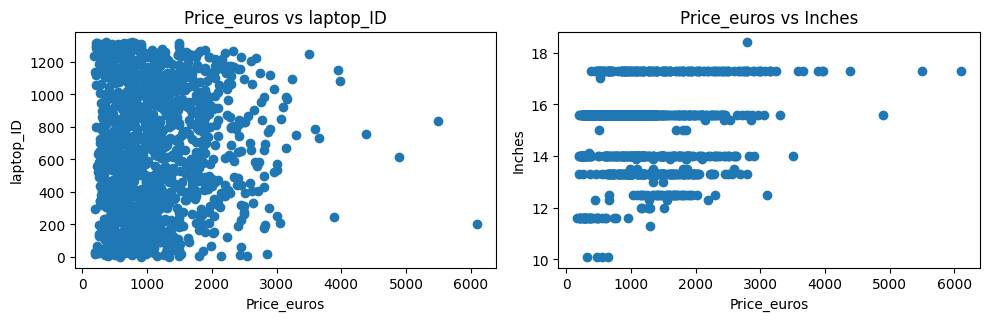

In [14]:
def scatter(y,fig):
    plt.subplot(17,2,fig)
    plt.scatter(df['Price_euros'],df[y])
    plt.title('Price_euros vs '+y)
    plt.ylabel(y)
    plt.xlabel('Price_euros')

plt.figure(figsize=(10,50))

scatter('laptop_ID', 1)
scatter('Inches', 2)

plt.tight_layout()

#### Correlation Heatmap

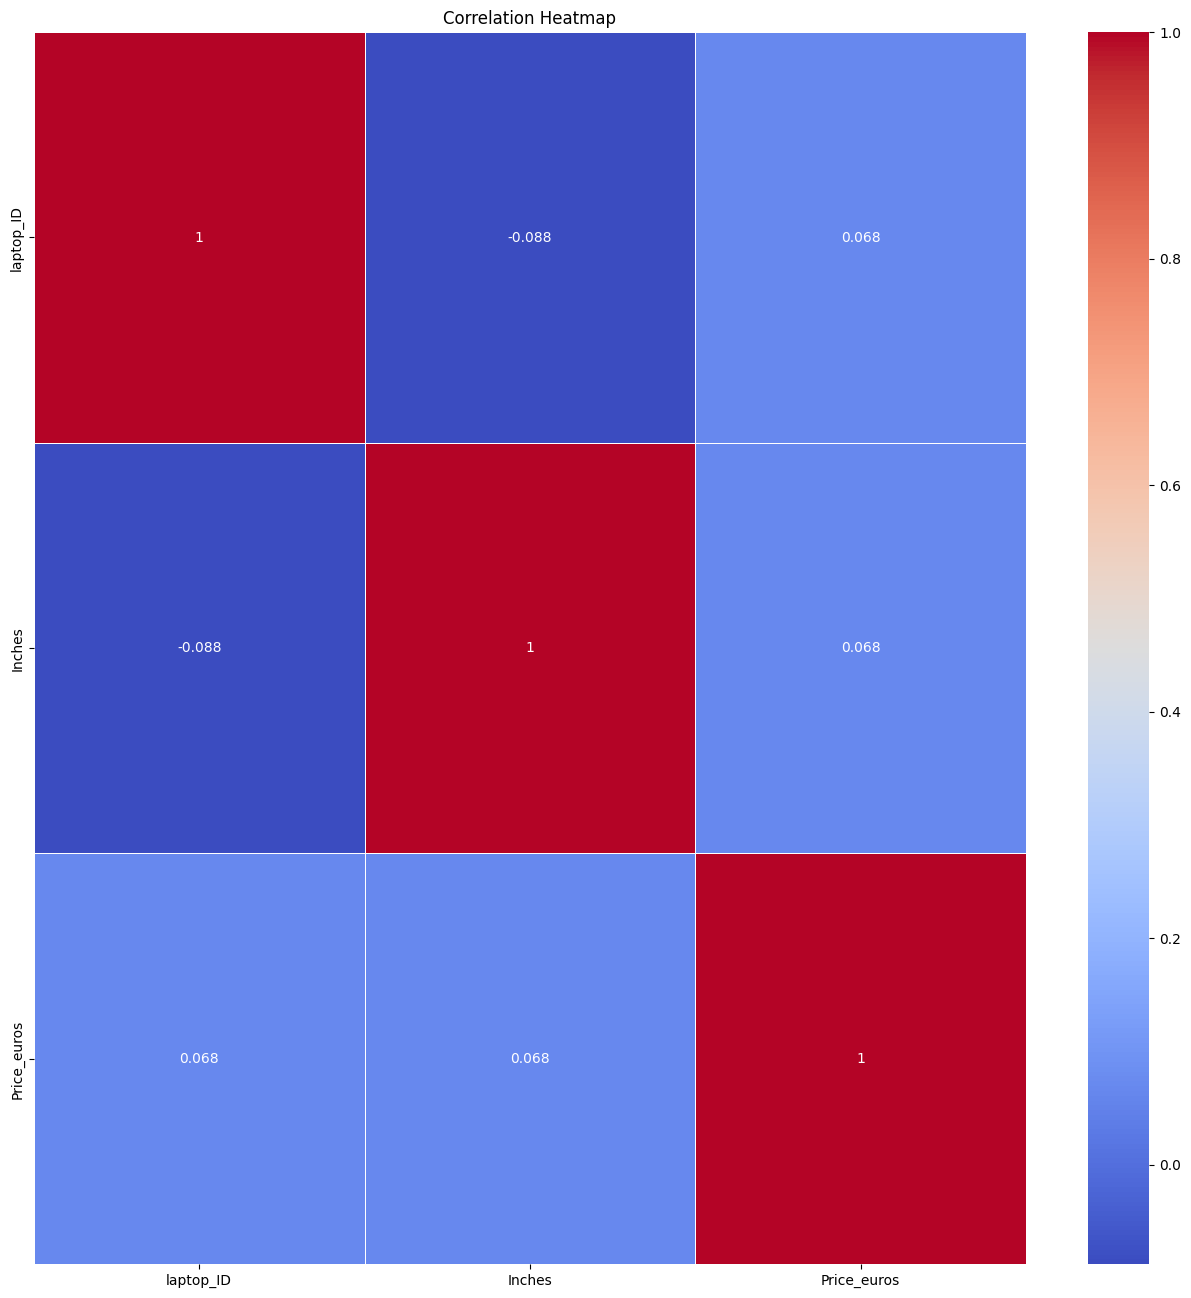

In [15]:
cor_matrix= df[numerical_features].corr()
plt.figure(figsize=(16, 16))  # Set the figure size
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [16]:
# convert the data type of Ram and Weight
df['Ram'] = df["Ram"].str.replace('GB','').astype('int32')
df['Weight'] = df["Weight"].str.replace('kg','').astype('float32')
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,macOS,1.34,898.94


In [17]:
df.corr(numeric_only=True)['Price_euros']

laptop_ID      0.067830
Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Name: Price_euros, dtype: float64

In [18]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

In [19]:
def add_company(inpt):
    if inpt == 'Samsung' or inpt == 'Razer' or inpt == 'Mediacom' or inpt == 'Microsoft' or inpt == 'Xiaomi' or inpt == 'Vero' or inpt == 'Chuwi' or inpt == 'Fujitsu' or inpt == 'Google' or inpt == 'LG' or inpt == 'Huawei':
        return 'Other'
    else:
        return inpt
df['Company'] = df['Company'].apply(add_company)

In [20]:
df['Company'].value_counts()

Company
Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: count, dtype: int64

In [21]:
len(df['Product'].value_counts())

618

In [22]:
df['TypeName'].value_counts()

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

In [23]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

In [24]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [25]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [26]:
df['Cpu_name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df['Cpu_name'].value_counts()

Cpu_name
Intel Core i7               527
Intel Core i5               423
Intel Core i3               136
Intel Celeron Dual           80
Intel Pentium Quad           27
Intel Core M                 19
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
AMD A8-Series 7410            4
Intel Atom x5-Z8550           4
AMD A9-Series 9410            3
Intel Pentium Dual            3
AMD Ryzen 1700                3
AMD A9-Series A9-9420         2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
AMD A6-Series A6-9220         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
Intel Xeon E3-1505M           2
Intel Xeon E3-1535M           2
Intel Atom X5-Z8350           2
Intel Atom x5-Z8300           1
AMD E-Series 6110             1
AMD E-Series 9000e            1
AMD E-Series E2-6110          1
AMD FX 9830P                  1

In [27]:
def set_processor(name):
    if name == 'Intel Core i7' or name == 'Intel Core i5' or name == 'Intel Core i3':
        return name
    else:
        if name.split()[0] == 'AMD':
            return 'AMD'
        else:
            return 'Other'
df['Cpu_name'] = df['Cpu_name'].apply(set_processor)

In [28]:
df['Cpu_name'].value_counts()

Cpu_name
Intel Core i7    527
Intel Core i5    423
Other            155
Intel Core i3    136
AMD               62
Name: count, dtype: int64

In [29]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [30]:
df['Gpu_name'] = df['Gpu'].apply(lambda x:" ".join(x.split()[0:1]))
df['Gpu_name'].value_counts()

Gpu_name
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [31]:
df = df[df['Gpu_name'] != 'ARM']
df.shape

(1302, 16)

In [32]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [33]:
def set_os(inpt):
    if inpt == 'Windows 10' or inpt == 'Windows 7' or inpt == 'Windows 10 S':
        return 'Windows'
    elif inpt == 'macOS' or inpt == 'Mac OS X':
        return 'Mac'
    elif inpt == 'Linux':
        return inpt
    else:
        return 'Other'
df['OpSys'] = df['OpSys'].apply(set_os)

In [34]:
df['OpSys'].value_counts()

OpSys
Windows    1125
Other        94
Linux        62
Mac          21
Name: count, dtype: int64

In [35]:
df.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,IPS,Cpu_name,Gpu_name
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,Mac,1.37,1339.69,0,1,Intel Core i5,Intel
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,Mac,1.34,898.94,0,0,Intel Core i5,Intel


In [36]:
df = df.drop(columns=['laptop_ID', 'Inches', 'Product', 'ScreenResolution', 'Cpu', 'Gpu'], errors='ignore')

### EDA after data cleaning

#### Visualizing Categorical Features

In [37]:
categorical_features = [x for x in df.columns if df[x].dtype =='object']
categorical_features

['Company', 'TypeName', 'OpSys', 'Cpu_name', 'Gpu_name']

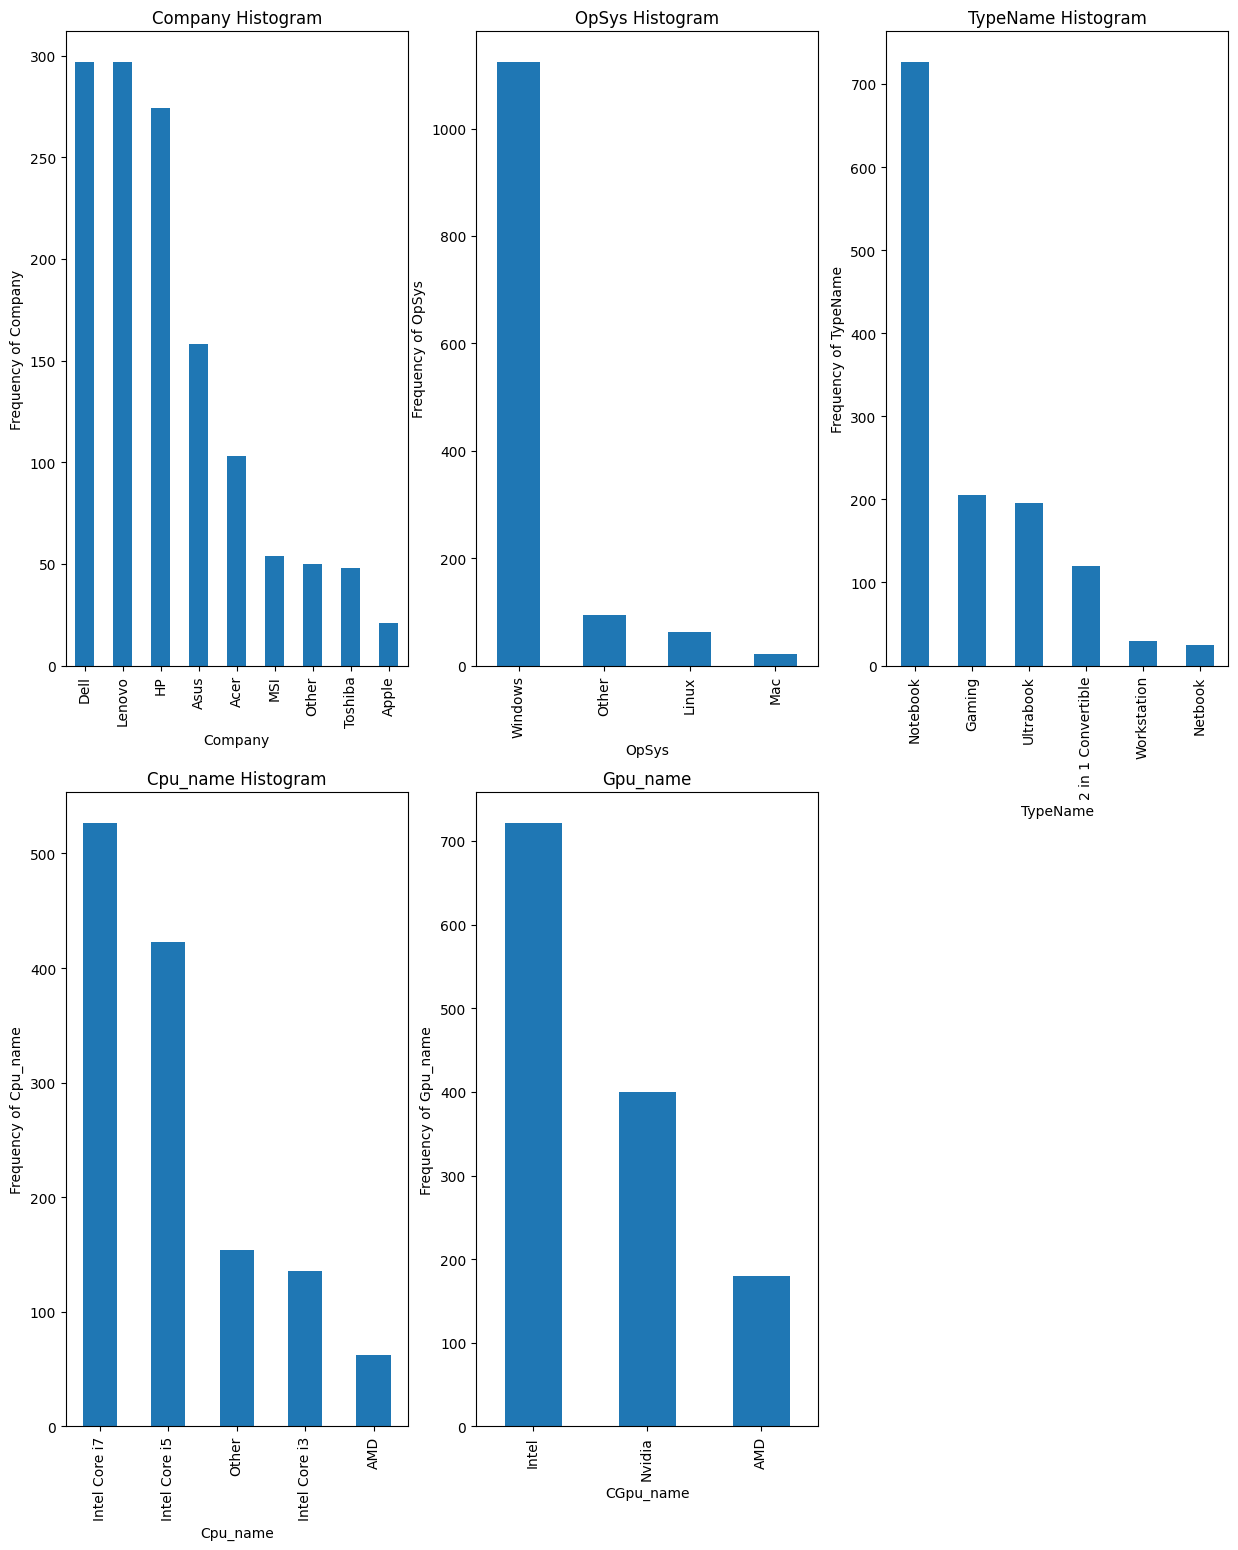

In [38]:
plt.figure(figsize=(15, 28))

plt.subplot(3, 3, 1)
plt1 = df['Company'].value_counts().plot(kind='bar')
plt.title('Company Histogram')
plt1.set(xlabel = 'Company', ylabel='Frequency of Company')

plt.subplot(3, 3, 2)
plt1 = df['OpSys'].value_counts().plot(kind='bar')
plt.title('OpSys Histogram')
plt1.set(xlabel = 'OpSys', ylabel='Frequency of OpSys')

plt.subplot(3, 3, 3)
plt1 = df['TypeName'].value_counts().plot(kind='bar')
plt.title('TypeName Histogram')
plt1.set(xlabel = 'TypeName', ylabel='Frequency of TypeName')

plt.subplot(3, 3, 4)
plt1 = df['Cpu_name'].value_counts().plot(kind='bar')
plt.title('Cpu_name Histogram')
plt1.set(xlabel = 'Cpu_name', ylabel='Frequency of Cpu_name')

plt.subplot(3, 3, 5)
plt1 = df['Gpu_name'].value_counts().plot(kind='bar')
plt.title('Gpu_name')
plt1.set(xlabel = 'CGpu_name', ylabel='Frequency of Gpu_name')

plt.show()

#### Visualizing Numerical Features

In [40]:
numerical_features = [x for x in df.columns if df[x].dtype in ('int64','float64','int32','float32')]
print(numerical_features)

['Ram', 'Weight', 'Price_euros', 'Touchscreen', 'IPS']


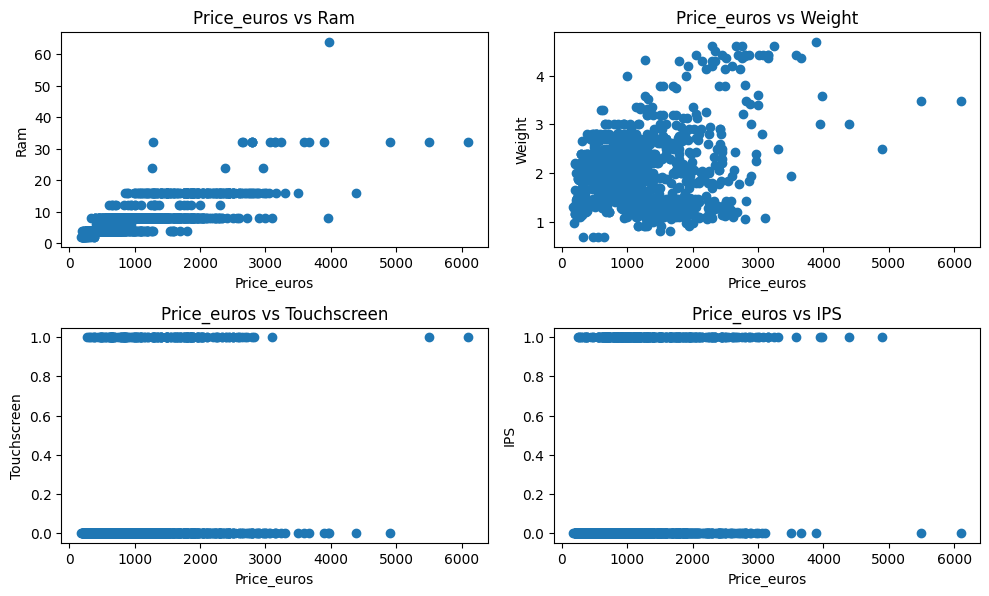

In [42]:
def scatter(y,fig):
    plt.subplot(17,2,fig)
    plt.scatter(df['Price_euros'],df[y])
    plt.title('Price_euros vs '+y)
    plt.ylabel(y)
    plt.xlabel('Price_euros')

plt.figure(figsize=(10,50))

scatter('Ram', 1)
scatter('Weight', 2)
scatter('Touchscreen', 3)
scatter('IPS', 4)

plt.tight_layout()

In [52]:
df = pd.get_dummies(df)
df.head(2)

,Ram,Weight,Price_euros,Touchscreen,IPS,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,...,OpSys_Other,OpSys_Windows,Cpu_name_AMD,Cpu_name_Intel Core i3,Cpu_name_Intel Core i5,Cpu_name_Intel Core i7,Cpu_name_Other,Gpu_name_AMD,Gpu_name_Intel,Gpu_name_Nvidia
0,8,1.37,1339.69,0,1,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,8,1.34,898.94,0,0,False,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False


In [53]:
df.to_csv("../data/processed/laptop_processed.csv", index=False)